In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import csv
from sklearn import linear_model, datasets, preprocessing, ensemble
# import theano
# from lasagne.layers import InputLayer, DropoutLayer, DenseLayer
# from lasagne.updates import nesterov_momentum
# from lasagne.objectives import binary_crossentropy
# from nolearn.lasagne import NeuralNet
%matplotlib inline

In [2]:
mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
weather = pd.read_csv('../input/weather.csv')
spray = pd.read_csv('../input/spray.csv')
sample_submission = pd.read_csv("../input/sampleSubmission.csv")

In [21]:
df_traps = train[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent', "NumMosquitos", "Species"]]
df_weather = weather[["Date", "Tavg"]]
df_combine = pd.merge(df_traps, df_weather, how="inner", on="Date")
df_combine.Tavg = df_combine.Tavg.astype(int)
present = df_combine[df_combine.WnvPresent == 1]
absent = df_combine[df_combine.WnvPresent == 0]
mean = {"Found": present.Tavg.mean(), "Not found": absent.Tavg.mean()}
df_mean = pd.DataFrame(mean, index=[0])

In [31]:
df_combine

,Date,Trap,Longitude,Latitude,WnvPresent,NumMosquitos,Species,Tavg
0,2007-05-29,T002,-87.800991,41.954690,0,1,CULEX PIPIENS/RESTUANS,74
1,2007-05-29,T002,-87.800991,41.954690,0,1,CULEX PIPIENS/RESTUANS,77
2,2007-05-29,T002,-87.800991,41.954690,0,1,CULEX RESTUANS,74
3,2007-05-29,T002,-87.800991,41.954690,0,1,CULEX RESTUANS,77
4,2007-05-29,T007,-87.769279,41.994991,0,1,CULEX RESTUANS,74
5,2007-05-29,T007,-87.769279,41.994991,0,1,CULEX RESTUANS,77
6,2007-05-29,T015,-87.824812,41.974089,0,1,CULEX PIPIENS/RESTUANS,74
7,2007-05-29,T015,-87.824812,41.974089,0,1,CULEX PIPIENS/RESTUANS,77
8,2007-05-29,T015,-87.824812,41.974089,0,4,CULEX RESTUANS,74
9,2007-05-29,T015,-87.824812,41.974089,0,4,CULEX RESTUANS,77


In [19]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['Species'].values) + list(test['Species'].values))
df_combine['Species'] = lbl.transform(df_combine['Species'].values)

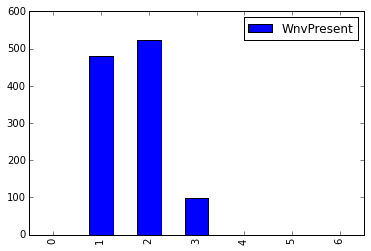

In [30]:
species = df_combine[["Species", "WnvPresent"]]
species = species.groupby(by="Species", as_index=False).sum()
species.plot(kind="bar")

In [32]:
species

,Species,WnvPresent
0,CULEX ERRATICUS,0
1,CULEX PIPIENS,480
2,CULEX PIPIENS/RESTUANS,524
3,CULEX RESTUANS,98
4,CULEX SALINARIUS,0
5,CULEX TARSALIS,0
6,CULEX TERRITANS,0


In [185]:
def convertInt(frame, col):
    frame[col] = frame[col].apply(int)
    return frame

convertInt(df_combine, "Latitude")
convertInt(df_combine, "Longitude")

,Date,Trap,Longitude,Latitude,WnvPresent,Tavg,NumMosquitos,Species
0,2007-05-29,T002,-87,41,0,74,1,CULEX PIPIENS/RESTUANS
1,2007-05-29,T002,-87,41,0,74,1,CULEX RESTUANS
2,2007-05-29,T002,-87,41,0,74,1,CULEX RESTUANS
3,2007-05-29,T002,-87,41,0,74,1,CULEX PIPIENS/RESTUANS
4,2007-05-29,T002,-87,41,0,74,4,CULEX RESTUANS
5,2007-05-29,T002,-87,41,0,74,2,CULEX RESTUANS
6,2007-05-29,T002,-87,41,0,74,1,CULEX RESTUANS
7,2007-05-29,T002,-87,41,0,74,1,CULEX PIPIENS/RESTUANS
8,2007-05-29,T002,-87,41,0,74,2,CULEX RESTUANS
9,2007-05-29,T002,-87,41,0,74,1,CULEX RESTUANS


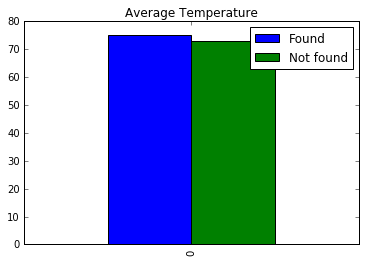

In [136]:
df_mean.plot(kind="bar", title="Average Temperature")

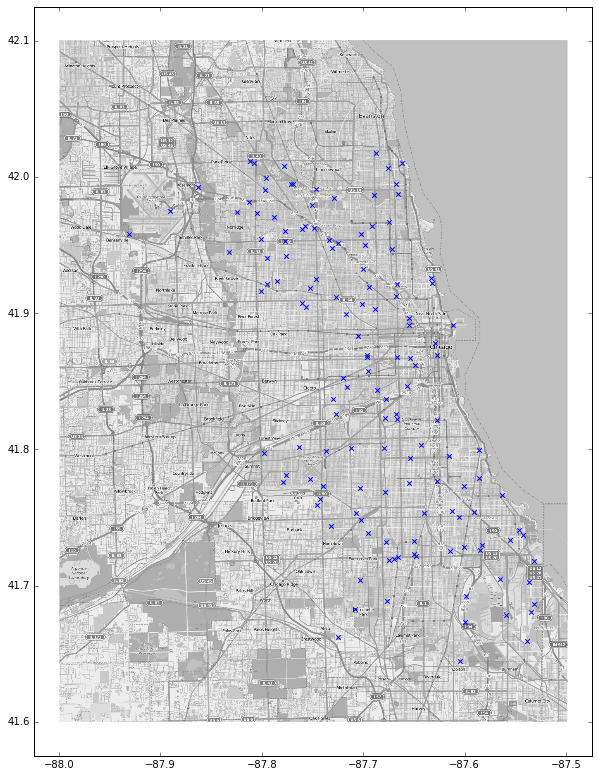

In [16]:
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')